In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_colwidth', False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("flat_houses_v2.csv")

In [ ]:
df.head(1)

,PROP_ID,PREFERENCE,PROPERTY_TYPE,DESCRIPTION,CITY_NAME,LOCALITY_NAME,GATED,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BATHROOM_ATTACHED,BALCONY_NUM,BALCONY_ATTACHED,BUILTUP_SQFT,CARPET_SQFT,SUPERBUILTUP_SQFT,FURNISH,FURNISHING_ATTRIBUTES,FACING,FLOOR_NUM,TOTAL_FLOOR,FEATURES,LATITUDE,LONGITUDE,AVAILABILITY,SUB_AVAILABILITY,CORNER_PROPERTY,AVG_PRICE,PRICE_SQFT,AMENITIES,AVG_PRICE_CR,AREA_SQFT
0,G71293060,S,flat,"Unity Group The Amaryllis is a ready to move project, offering a great 6 BHK flat in Karol Bagh, Central Delhi. The unit has a carpet area of 3173.0 sq. ft. and is available at a price of Rs. 10.3 Crore. \n\nUnity Group The Amaryllis is well connected to the city areas and features a large number of amenities to fit your needs. It is equipped with highlights such as Swimming Pool, 24x7 Security, Squash Court, Library, Badminton Court, etc. that make it one of the most sought after neighborhoods.",Central Delhi,Karol Bagh,NaN,New Booking,Freehold,6.0,0,NaN,NaN,NaN,NaN,3173.0,NaN,NaN,NaN,NaN,1.0,32.0,N,28.657811,77.19466,Under Construction,Not Mentioned,NaN,103000000,32461,[],10.3,3173.038415


In [ ]:
df.isnull().sum()

PROP_ID                  0   
PREFERENCE               0   
PROPERTY_TYPE            0   
DESCRIPTION              0   
CITY_NAME                0   
LOCALITY_NAME            0   
GATED                    4047
TRANSACT_TYPE            0   
OWNTYPE                  0   
BEDROOM_NUM              0   
BATHROOM_NUM             0   
BATHROOM_ATTACHED        3908
BALCONY_NUM              200 
BALCONY_ATTACHED         3908
BUILTUP_SQFT             4659
CARPET_SQFT              3932
SUPERBUILTUP_SQFT        4659
FURNISH                  900 
FURNISHING_ATTRIBUTES    2509
FACING                   2760
FLOOR_NUM                2505
TOTAL_FLOOR              66  
FEATURES                 0   
LATITUDE                 0   
LONGITUDE                0   
AVAILABILITY             0   
SUB_AVAILABILITY         0   
CORNER_PROPERTY          4890
AVG_PRICE                0   
PRICE_SQFT               0   
AMENITIES                0   
AVG_PRICE_CR             0   
AREA_SQFT                85  
dtype: int

In [ ]:
df["GATED"].value_counts()

Y    3394
Name: GATED, dtype: int64

In [ ]:
df["BALCONY_ATTACHED"].value_counts()

N    3533
Name: BALCONY_ATTACHED, dtype: int64

In [ ]:
df["BATHROOM_ATTACHED"].value_counts()

N    3533
Name: BATHROOM_ATTACHED, dtype: int64

In [ ]:
df["CORNER_PROPERTY"].value_counts()

Y    2534
N    17  
Name: CORNER_PROPERTY, dtype: int64

In [ ]:
# drop balcony attached, bathroom attached, gated community and corner property

In [ ]:
df.drop(columns = ["PREFERENCE", "BALCONY_ATTACHED", "DESCRIPTION", "GATED", "CORNER_PROPERTY", "BATHROOM_ATTACHED"], inplace = True)

In [ ]:
df.isnull().sum()

PROP_ID                  0   
PROPERTY_TYPE            0   
DESCRIPTION              0   
CITY_NAME                0   
LOCALITY_NAME            0   
TRANSACT_TYPE            0   
OWNTYPE                  0   
BEDROOM_NUM              0   
BATHROOM_NUM             0   
BALCONY_NUM              200 
BUILTUP_SQFT             4659
CARPET_SQFT              3932
SUPERBUILTUP_SQFT        4659
FURNISH                  900 
FURNISHING_ATTRIBUTES    2509
FACING                   2760
FLOOR_NUM                2505
TOTAL_FLOOR              66  
FEATURES                 0   
LATITUDE                 0   
LONGITUDE                0   
AVAILABILITY             0   
SUB_AVAILABILITY         0   
AVG_PRICE                0   
PRICE_SQFT               0   
AMENITIES                0   
AVG_PRICE_CR             0   
AREA_SQFT                85  
dtype: int64

-- carpet area

-- builtup area (carpet area + thickness of wall + balcony)

-- superbuiltup area (also include any shared property)

# PRICE

In [ ]:
index_to_delete = df[df["AVG_PRICE"] == 0].index

In [ ]:
df.drop(index = index_to_delete, inplace = True)

## AREA




Creating a calculated area column for final model.

In [ ]:
def calculate_area_sqft(df_row):
  if df_row["PROPERTY_TYPE"] == "house":
    # for houses we will make use of plot area and plot area information is in AREA_SQFT column
    calculated_area = df_row["AREA_SQFT"]
  else:
    calculated_area = df_row["BUILTUP_SQFT"]
  return calculated_area

In [ ]:
df["CALCULATED_AREA_SQFT"] = df.apply(calculate_area_sqft, axis  = 1)

In [ ]:
df[df["PROPERTY_TYPE"] == "house"]["CALCULATED_AREA_SQFT"].isnull().sum()

0

Calculation for builtup_sqft for flats only because we are considering plot area for houses which we have already filled in calculated_area column and there is no null values for plot area in houses.

In [ ]:
flat_df = df[df["PROPERTY_TYPE"] == "flat"]

<Axes: xlabel='CALCULATED_AREA_SQFT', ylabel='SUPERBUILTUP_SQFT'>

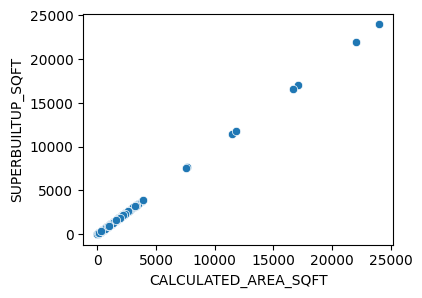

In [ ]:
plt.figure(figsize = (4,3))
sns.scatterplot(data = flat_df, x = "CALCULATED_AREA_SQFT", y = "SUPERBUILTUP_SQFT")

<Axes: xlabel='BUILTUP_SQFT', ylabel='CARPET_SQFT'>

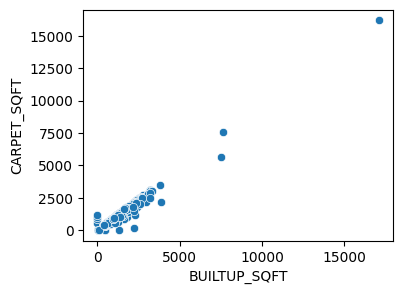

In [ ]:
plt.figure(figsize = (4,3))
sns.scatterplot(data = flat_df, x = "BUILTUP_SQFT", y = "CARPET_SQFT")

In [ ]:
# rows where all the areas are null
flat_df[(flat_df["BUILTUP_SQFT"].isnull()) & (flat_df["SUPERBUILTUP_SQFT"].isnull()) & (flat_df["CARPET_SQFT"].isnull())][0:20]

In [ ]:
# rows where all the areas are present
all_present_df = flat_df[~((flat_df["BUILTUP_SQFT"].isnull()) | (flat_df["SUPERBUILTUP_SQFT"].isnull()) | (flat_df["CARPET_SQFT"].isnull()))]

In [ ]:
all_present_df.shape

(1192, 28)

In [ ]:
super_to_builtup_ratio = (all_present_df["SUPERBUILTUP_SQFT"]/all_present_df["BUILTUP_SQFT"]).median()

In [ ]:
carpet_to_builtup_ratio = (all_present_df["CARPET_SQFT"]/all_present_df["BUILTUP_SQFT"]).median()

In [ ]:
print(super_to_builtup_ratio, carpet_to_builtup_ratio)

1.0 0.9345621794570178


In [ ]:
# superbuiltup, carpet -> not null and builtup -> null
sbc_df = flat_df[(~flat_df["SUPERBUILTUP_SQFT"].isnull()) & (flat_df["BUILTUP_SQFT"].isnull()) & (~flat_df["CARPET_SQFT"].isnull())]

In [ ]:
sbc_df.head()

,PROP_ID,PROPERTY_TYPE,CITY_NAME,LOCALITY_NAME,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,BUILTUP_SQFT,CARPET_SQFT,SUPERBUILTUP_SQFT,FURNISH,FURNISHING_ATTRIBUTES,FACING,FLOOR_NUM,TOTAL_FLOOR,FEATURES,LATITUDE,LONGITUDE,AVAILABILITY,SUB_AVAILABILITY,AVG_PRICE,PRICE_SQFT,AMENITIES,AVG_PRICE_CR,AREA_SQFT,CALCULATED_AREA_SQFT


In [ ]:
# superbuiltup not null,
# carpet, builtup -> null
sb_df = flat_df[(~flat_df["SUPERBUILTUP_SQFT"].isnull()) & (flat_df["BUILTUP_SQFT"].isnull()) & (flat_df["CARPET_SQFT"].isnull())]

In [ ]:
sb_df

,PROP_ID,PROPERTY_TYPE,CITY_NAME,LOCALITY_NAME,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,BUILTUP_SQFT,CARPET_SQFT,SUPERBUILTUP_SQFT,FURNISH,FURNISHING_ATTRIBUTES,FACING,FLOOR_NUM,TOTAL_FLOOR,FEATURES,LATITUDE,LONGITUDE,AVAILABILITY,SUB_AVAILABILITY,AVG_PRICE,PRICE_SQFT,AMENITIES,AVG_PRICE_CR,AREA_SQFT,CALCULATED_AREA_SQFT


In [ ]:
# carpet not null
# superbuiltup and builtup is null
c_df = flat_df[(flat_df["SUPERBUILTUP_SQFT"].isnull()) & (flat_df["BUILTUP_SQFT"].isnull()) & ~(flat_df["CARPET_SQFT"].isnull())]

In [ ]:
c_df.shape

(1948, 28)

In [ ]:
c_df["BUILTUP_SQFT"].fillna(round(c_df["CARPET_SQFT"]/0.9), inplace = True)

<ipython-input-119-dd934dae7d92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df["BUILTUP_SQFT"].fillna(round(c_df["CARPET_SQFT"]/0.9), inplace = True)


In [ ]:
prop_id = c_df["PROP_ID"].values

In [ ]:
df.loc[df["PROP_ID"].isin(prop_id), "CALCULATED_AREA_SQFT"] = c_df["BUILTUP_SQFT"]

In [ ]:
df.head()

,PROP_ID,PROPERTY_TYPE,CITY_NAME,LOCALITY_NAME,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,BUILTUP_SQFT,CARPET_SQFT,SUPERBUILTUP_SQFT,FURNISH,FURNISHING_ATTRIBUTES,FACING,FLOOR_NUM,TOTAL_FLOOR,FEATURES,LATITUDE,LONGITUDE,AVAILABILITY,SUB_AVAILABILITY,AVG_PRICE,PRICE_SQFT,AMENITIES,AVG_PRICE_CR,AREA_SQFT,CALCULATED_AREA_SQFT
0,G71293060,flat,Central Delhi,Karol Bagh,New Booking,Freehold,6.0,0,NaN,NaN,3173.0,NaN,NaN,NaN,NaN,1.0,32.0,N,28.657811,77.19466,Under Construction,Not Mentioned,103000000,32461,[],10.30,3173.038415,3526.0
1,Y71293054,flat,Central Delhi,Karol Bagh,New Booking,Freehold,5.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,32.0,N,28.657811,77.19466,Under Construction,Not Mentioned,102983146,32461,[],10.30,3172.519208,NaN
2,D71293050,flat,Central Delhi,Karol Bagh,New Booking,Freehold,4.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,32.0,N,28.657811,77.19466,Under Construction,Not Mentioned,62362438,33233,[],6.24,1876.521470,NaN
3,B71293046,flat,Central Delhi,Karol Bagh,New Booking,Freehold,3.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,32.0,N,28.657811,77.19466,Under Construction,Not Mentioned,30500000,30214,[],3.05,1009.465811,NaN
4,A71293042,flat,Central Delhi,Karol Bagh,New Booking,Freehold,2.0,2,NaN,NaN,741.0,NaN,NaN,NaN,NaN,1.0,32.0,N,28.657811,77.19466,Under Construction,Not Mentioned,19500156,26316,[],1.95,741.000000,823.0


In [ ]:
# There are around 1200 flats whose all areas are null (superbuiltup, builtu and carpet), so I am going to fill with the AREA_SQFT values

In [ ]:
all_area_nan_df = df[((df["SUPERBUILTUP_SQFT"].isnull()) & (df["BUILTUP_SQFT"].isnull()) & (df["CARPET_SQFT"].isnull()))][["PROP_ID", "AVG_PRICE", "PROPERTY_TYPE", "AREA_SQFT", "SUPERBUILTUP_SQFT", "BUILTUP_SQFT", "CARPET_SQFT"]]

In [ ]:
df.loc[df["PROP_ID"].isin(all_area_nan_df["PROP_ID"]), "CALCULATED_AREA_SQFT"] = df.loc[all_area_nan_df.index, "AREA_SQFT"]

In [ ]:
df.drop(columns = ["BUILTUP_SQFT", "CARPET_SQFT", "SUPERBUILTUP_SQFT"], inplace = True)

## AGE

In [ ]:
df["SUB_AVAILABILITY"].value_counts()

10+ years old        2633
5 to 10 years old    2161
1 to 5 years old     1316
0 to 1 year old      1081
Not Mentioned        136 
Name: SUB_AVAILABILITY, dtype: int64

In [ ]:
def categorize_age_possession(value):
  if pd.isna(value):
    return "Not Mentioned"
  if "0 to 1 year old" in value or "Within 6 months" in value or "Within 3 months" in value:
    return "New Property"
  if "1 to 5 years old" in value:
    return "Relatively New"
  if "5 to 10 years old" in value:
    return "Moderately old"
  if "10+ years old" in value:
    return "Old Property"
  if "Under Construction" in value or "By" in value:
        return "Under Construction"
  try:
    int(value.split(" ")[-1])
    return "Under Construction"
  except:
    return "Not Mentioned"

In [ ]:
df["AGE_POSSESSION"] = df["SUB_AVAILABILITY"].apply(categorize_age_possession)

In [ ]:
df["AGE_POSSESSION"].value_counts()

Old Property      2633
Moderately old    2161
Relatively New    1316
New Property      1081
Not Mentioned     136 
Name: AGE_POSSESSION, dtype: int64

In [ ]:
df["AVAILABILITY"].value_counts()

Ready to move         7191
Under Construction    136 
Name: AVAILABILITY, dtype: int64

In [ ]:
df.drop(columns = ["SUB_AVAILABILITY"], inplace = True)

In [ ]:
df.reset_index(inplace = True)

## AMENITIES

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
import ast

In [ ]:
df["AMENITIES"][5]

"['Fang Shui/ Vaastu Complaint', 'Water Purifier', 'Maintenance Staff', 'False Ceiling lighting', 'Water Storage', 'Near Bank', 'Gas Pipeline', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Gymnasium', 'AC Room']"

In [ ]:
df["AMENITIES"] = df["AMENITIES"].apply(lambda x: ast.literal_eval(x))

In [ ]:
# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
amenities_binary_matrix = mlb.fit_transform(df["AMENITIES"])

# Convert the binary matrix into a DataFrame
amenities_binary_df = pd.DataFrame(amenities_binary_matrix, columns = mlb.classes_)


In [ ]:
amenities_binary_df.head(7)

,AC Room,Air Conditioned,Airy Rooms,Bank Attached Property,Club House,False Ceiling lighting,Fang Shui/ Vaastu Complaint,Gas Pipeline,Gymnasium,High Cieling Height,Intercom Facility,Internet Wifi Connectivity,Lift,Low Density Society,Maintenance Staff,Natural light,Near Bank,No open Drainage Around,Park,Pet Friendly,Power Backup,Private Garden/Terrace,Security Fire Alarm,Security Personnel,Separate Entry For Servant Room,Shopping Centre,Spacious Interiors,Swimming Pool,Visitor Parking,Waste Disposal,Water Purifier,Water Softening Plant,Water Storage,Wheelchair
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
wcss_reduced = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(amenities_binary_df)
  wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

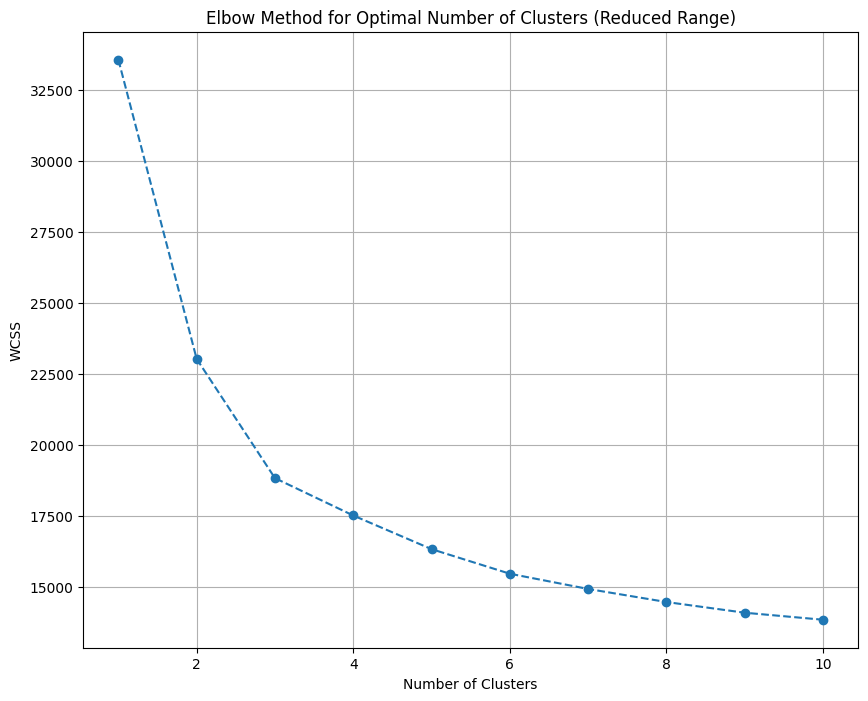

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss_reduced, marker = 'o', linestyle = '--')
plt.title('Elbow Method for Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
n_clusters = 3

#Fit the KMeans model
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(amenities_binary_df)
# Predict the cluster assignment for each row
cluster_assignment = kmeans.predict(amenities_binary_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df["AMENITIES_CLUSTER"] = cluster_assignment

In [ ]:
df.sample(5)[["AMENITIES", "AMENITIES_CLUSTER"]]

,AMENITIES,AMENITIES_CLUSTER
3950,"[Intercom Facility, Lift, Swimming Pool, Park, Visitor Parking, Gymnasium, Club House]",2
4509,[AC Room],1
2970,[],1
4322,"[Intercom Facility, Lift]",1
4553,[],1


In [ ]:
def amenities_cluster(x):
  if x == 0:
    return "High-End"
  if x == 1:
    return "Basic"
  if x == 2:
    return "Moderate"


In [ ]:
df["AMENITIES_CLUSTER"] = df["AMENITIES_CLUSTER"].apply(lambda x: amenities_cluster(x))

In [ ]:
luxury_scores = {
    'Swimming Pool': 9,
    'Air Conditioned': 7,
    'Wheelchair': 3,
    'Pet Friendly': 4,
    'AC Room': 6,
    'Gymnasium': 8,
    'Security Fire Alarm': 5,
    'Visitor Parking': 4,
    'Power Backup': 6,
    'Intercom Facility': 4,
    'Lift': 7,
    'Maintenance Staff': 4,
    'Water Storage': 3,
    'Waste Disposal': 3,
    'Bank Attached Property': 4,
    'Gas Pipeline': 5,
    'Club House': 8,
    'Internet Wifi Connectivity': 6,
    'Water Softening Plant': 4,
    'Water Purifier': 5,
    'Shopping Centre': 5,
    'Near Bank': 4,
    'Natural light': 5,
    'Airy Rooms': 5,
    'Spacious Interiors': 6,
    'Low Density Society': 6,
    'High Cieling Height': 7,
    'False Ceiling lighting': 6,
    'Separate Entry For Servant Room': 4,
    'No open Drainage Around': 5,
    'Fang Shui/ Vaastu Complaint': 4,
    'Park': 6,
    'Private Garden/Terrace': 8,
    'Security Personnel': 5,
    'Food Service': 4,
    'Laundary Available': 4,
    'Parking': 6,
    'DJ Availability': 4,
    'WheelChair Accessibility': 3,
    'ATM': 4
}


In [ ]:
l1 = []
for i in luxury_scores.keys():
  if i not in amenities_binary_df.columns:
    l1.append(i)
for i in l1:
  del luxury_scores[i]

In [ ]:
score = amenities_binary_df[list(luxury_scores.keys())].multiply(list(luxury_scores.values())).sum(axis=1)

In [ ]:
amenities_binary_df[list(luxury_scores.keys())][7300:7301].multiply(list(luxury_scores.values())).sum(axis = 1)

7300    93
dtype: int64

In [ ]:
df["LUXURY_SCORE"] = score

In [ ]:
df[["PROP_ID","AMENITIES", "AMENITIES_CLUSTER","LUXURY_SCORE"]]

In [ ]:
df.drop(columns = ["index","FURNISHING_ATTRIBUTES", "FEATURES", "AMENITIES", "TRANSACT_TYPE"], inplace = True)

In [ ]:
df["OWNTYPE"].value_counts()

Freehold                6538
Power of Attorney       649 
Leasehold               89  
Co-operative Society    51  
Name: OWNTYPE, dtype: int64

In [ ]:
df[df["PROPERTY_TYPE"] == "house"]["OWNTYPE"].value_counts()

Freehold                1959
Power of Attorney       433 
Leasehold               17  
Co-operative Society    3   
Name: OWNTYPE, dtype: int64

In [ ]:
df.to_csv("flat_house_v3.csv", index = False)